![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

# Agrupamento com scikit-learn

Nosso problema de agrupamento é dividir em grupos semelhantes as especie de uma flor dada algumas características de entrada. Vamos trabalhar com um conhecido dataset de estudo o **iris**.

POST: [Agrupamento com scikit-learn](https://dadosaocubo.com/agrupamento-com-scikit-learn)

## Importar bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


## Selecionar dataset

In [ ]:
# Selecionando os dados do iris
df = sns.load_dataset("iris")
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


Podemos selecionar os nossos dados de algumas fontes, hoje escolhi selecionar através da função **load_dataset()**. Essa função está disponível na biblioteca gráfica **seaborn**, que alem de ter os gráficos mais bonitos, ainda tem vários exemplos para que possamos fazer nossos testes.

## Verificar dados

In [ ]:
# Nome das flores
list(df['species'].unique())

['setosa', 'versicolor', 'virginica']

Aqui listamos os nossos tipos de espécies de flores do nosso conjunto de dados.

In [ ]:
# Resumo das observações
print('|-------------------------------|')
print('|     Resumo das observações    |')
print('|-------------------------------|')
print('|Classes                  |', len(df['species'].unique()), '  |')
print('|-------------------------------|')
print('|Observações por Classe   |', df['species'].value_counts().unique()[0], ' |')
print('|-------------------------------|')
print('|Total observações        |', df.shape[0], '|')
print('|-------------------------------|')
print('|Dimensionalidade         |', df.shape[1] - 1, '  |')
print('|-------------------------------|')

|-------------------------------|
|     Resumo das observações    |
|-------------------------------|
|Classes                  | 3   |
|-------------------------------|
|Observações por Classe   | 50  |
|-------------------------------|
|Total observações        | 150 |
|-------------------------------|
|Dimensionalidade         | 4   |
|-------------------------------|


Na figura podemos ver as 4 características sendo analisadas em pares, através de gráficos de dispersão (através das coordenadas cartesianas para exibir valores de um conjunto de dados) e na diagonal principal histogramas (analisa a distribuição de frequências) de cada característica.

## Configruração dos gráficos

In [ ]:
# Configuraçõe dos gráficos
plt.rcParams['figure.figsize'] = (11,7)
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['font.size'] = 30 
plt.rcParams['axes.titlesize'] = 30 
plt.rcParams['axes.labelsize'] = 30 

## Selecionar variáveis de entrada

In [ ]:
X = df.drop(columns='species').copy()

Para as variáveis de entrada vamos selecionar todas as caracteristicas da flor, ou seja, toda a nossa dimensionalidade (são os atributos dos dados), neste exemplo temos 4.

## K-means

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Centroides das entradas
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# Clusters das entradas
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Avaliação

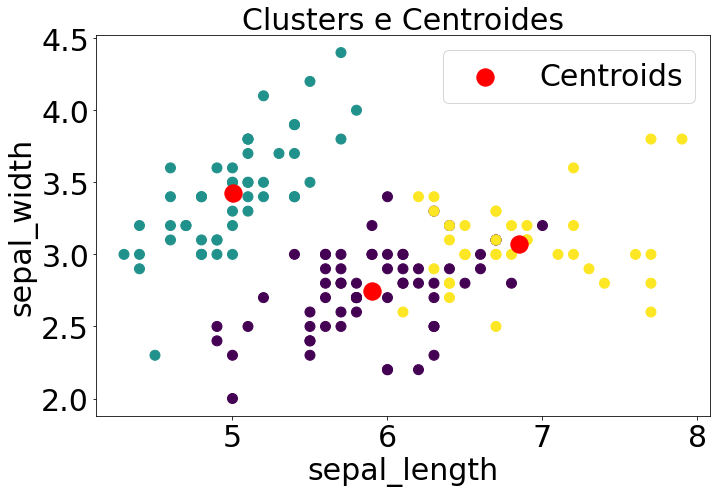

In [ ]:
# Visualizando resultados
plt.scatter(X['sepal_length'], X['sepal_width'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters e Centroides')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

## Método Elbow

Para 1 clusters a soma das distâncias quadradas é: 681.3706
Para 2 clusters a soma das distâncias quadradas é: 152.34795176035792
Para 3 clusters a soma das distâncias quadradas é: 78.85144142614601
Para 4 clusters a soma das distâncias quadradas é: 57.25600931571815
Para 5 clusters a soma das distâncias quadradas é: 46.44618205128205
Para 6 clusters a soma das distâncias quadradas é: 39.03998724608725
Para 7 clusters a soma das distâncias quadradas é: 34.782204184704185
Para 8 clusters a soma das distâncias quadradas é: 30.398888059051373
Para 9 clusters a soma das distâncias quadradas é: 27.86025908397476




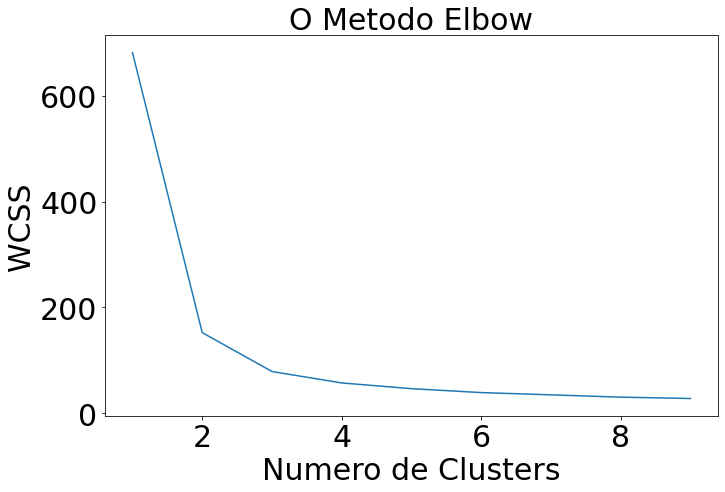

In [ ]:
# Validação direta da divisão dos clusters
X_elbow = X.copy()
wcss = []
 
for i in range(1, 10):
    kmeans_elbow = KMeans(n_clusters = i)
    kmeans_elbow.fit(X_elbow)
    print ('Para', i, 'clusters a soma das distâncias quadradas é:', kmeans_elbow.inertia_)
    wcss.append(kmeans_elbow.inertia_)  
print('\n')
plt.plot(range(1, 10), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS', fontsize=30) # within cluster sum of squares
plt.show()

## Método Silhouette

Para 2 clusters a silhueta média é: 0.6810461692117465
Para 3 clusters a silhueta média é: 0.5528190123564102
Para 4 clusters a silhueta média é: 0.49805050499728815
Para 5 clusters a silhueta média é: 0.48874888709310654
Para 6 clusters a silhueta média é: 0.36483400396700366




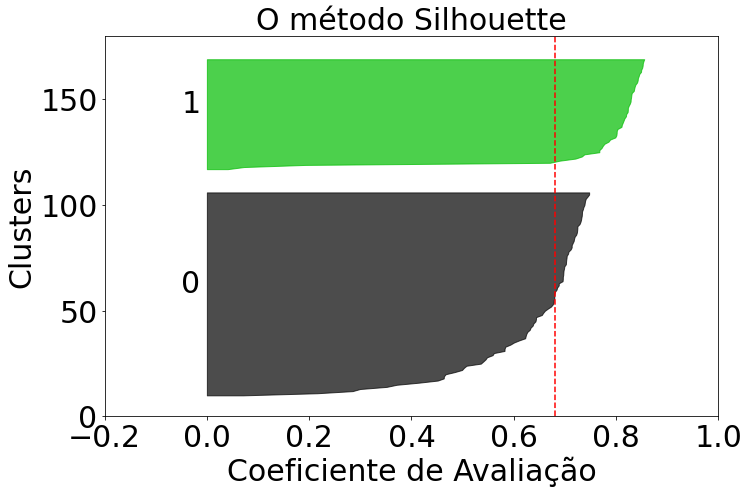

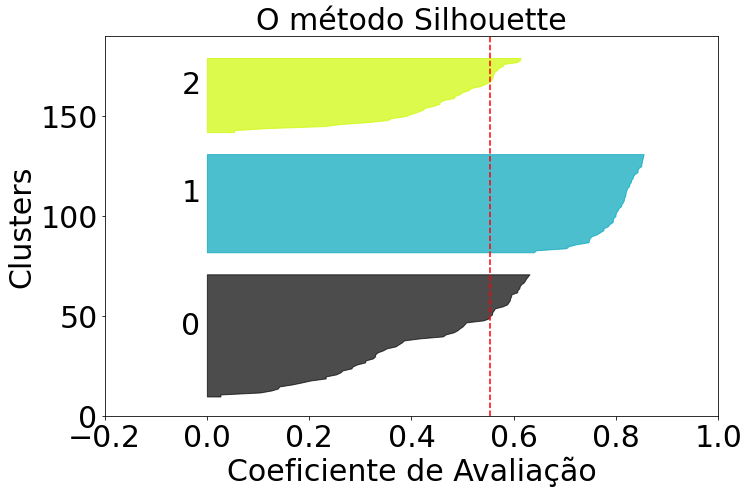

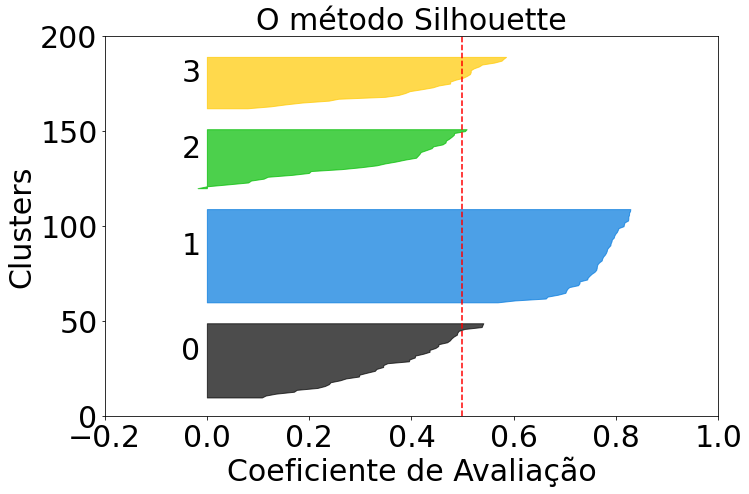

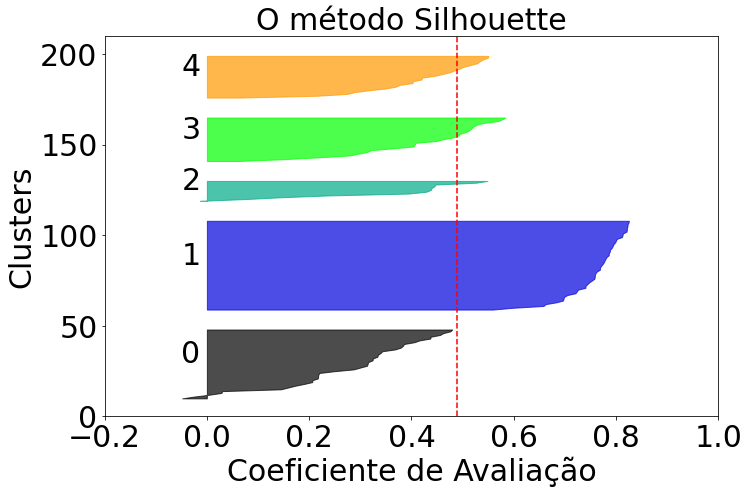

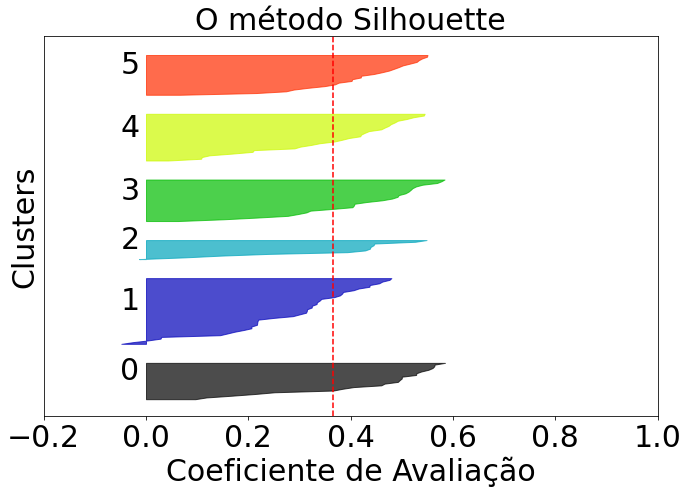

In [ ]:
for n_clusters in range(2,7):
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X)

  silhouette_avg = silhouette_score(X, cluster_labels)
  print("Para", n_clusters, "clusters a silhueta média é:", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  fig, ax1 = plt.subplots()
  ax1.set_xlim([-0.2, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_title("O método Silhouette")
  ax1.set_xlabel("Coeficiente de Avaliação")
  ax1.set_ylabel("Clusters")

print('\n')
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

## Cluster x Classificação do Dados

In [ ]:
# Adicionando os grupos no df
labels = kmeans.labels_
df['kmeans'] = labels

# Verificando como ficou a divisão dos clusters
print('\nDivisão das classes originais')
print(df['species'].value_counts())

# Verificando como ficou a divisão dos clusters
print('\nDivisão dos grupos pelo K-means')
print(df['kmeans'].value_counts())


Divisão das classes originais
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Divisão dos grupos pelo K-means
0    62
1    50
2    38
Name: kmeans, dtype: int64


In [ ]:
df.query('species == "versicolor"')['kmeans'].value_counts()

0    48
2     2
Name: kmeans, dtype: int64

In [ ]:
df.query('species == "virginica"')['kmeans'].value_counts()

2    36
0    14
Name: kmeans, dtype: int64

In [ ]:
df.query('species == "setosa"')['kmeans'].value_counts()

1    50
Name: kmeans, dtype: int64

In [ ]:
# Validação da divisão dos clusters
X_valida = X.copy()
df_valida = df.copy()
for i in range(2, 6):
    kmeans_valida = KMeans(n_clusters = i)
    kmeans_valida.fit(X_valida)
    df_valida['kmeans'] = kmeans_valida.labels_
    print('K =', i)
    for j in list(df['species'].unique()):
        per_valida = df_valida.query('species == @j')['kmeans'].value_counts().max()/df_valida.query('species == @j').shape[0]
        class_valida = df_valida.query('species == @j')['kmeans'].value_counts().index[0]
        print('Espécie {}'.format(j), 'Cluster', class_valida, '- Percentual de acerto {:.0%}'.format(per_valida))
    print(55*'=')

K = 2
Espécie setosa Cluster 1 - Percentual de acerto 100%
Espécie versicolor Cluster 0 - Percentual de acerto 94%
Espécie virginica Cluster 0 - Percentual de acerto 100%
K = 3
Espécie setosa Cluster 1 - Percentual de acerto 100%
Espécie versicolor Cluster 0 - Percentual de acerto 96%
Espécie virginica Cluster 2 - Percentual de acerto 72%
K = 4
Espécie setosa Cluster 1 - Percentual de acerto 100%
Espécie versicolor Cluster 0 - Percentual de acerto 54%
Espécie virginica Cluster 2 - Percentual de acerto 64%
K = 5
Espécie setosa Cluster 0 - Percentual de acerto 100%
Espécie versicolor Cluster 1 - Percentual de acerto 52%
Espécie virginica Cluster 2 - Percentual de acerto 48%


## Bônus Kmeans com PCA

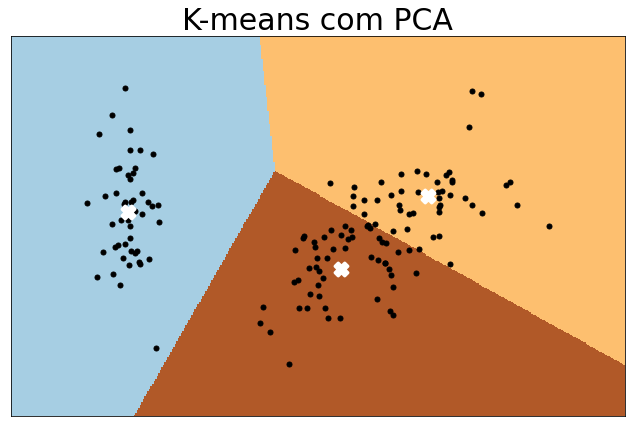

In [ ]:
data = scale(X)

n_samples, n_features = data.shape
n_clusters = 3

# Inicializando o PCA
pca = PCA(n_components=n_clusters).fit(data)

# Visualizando o resultado do PCA-reduced
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=4)
kmeans.fit(reduced_data)

# Plotar o limite de decisão atribuiremos uma cor a cada.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Selecionando labels do último modelo treinado
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Colocando a cor do gráfico
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
# Plotanto os centroides com um X branco
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=169, linewidths=3, color='w', zorder=10)
# Parametros dos eixos
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
# Plotando a imagem
plt.title("K-means com PCA")
plt.show()